# **Classification of Traffic signs using Visual bag of words**

 Installing and Importing

In [1]:
#installing textable
!pip install texttable
#importing libraries
import csv
import os
import pandas as pd
from numpy import genfromtxt
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans,vq
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from scipy.cluster.vq import vq
from texttable import Texttable

Unziping CS893 Sp2022 A1 Dataset.zip

In [2]:
!unzip /content/'CS893 Sp2022 A1 Dataset.zip' -d /content/dataset

Archive:  /content/CS893 Sp2022 A1 Dataset.zip
   creating: /content/dataset/00001/
  inflating: /content/dataset/00001/00025_00000.ppm  
  inflating: /content/dataset/00001/00025_00001.ppm  
  inflating: /content/dataset/00001/00025_00002.ppm  
  inflating: /content/dataset/00001/00029_00000.ppm  
  inflating: /content/dataset/00001/00029_00001.ppm  
  inflating: /content/dataset/00001/00029_00002.ppm  
  inflating: /content/dataset/00001/00079_00000.ppm  
  inflating: /content/dataset/00001/00079_00001.ppm  
  inflating: /content/dataset/00001/00079_00002.ppm  
  inflating: /content/dataset/00001/00136_00000.ppm  
  inflating: /content/dataset/00001/00136_00001.ppm  
  inflating: /content/dataset/00001/00136_00002.ppm  
  inflating: /content/dataset/00001/00143_00000.ppm  
  inflating: /content/dataset/00001/00143_00001.ppm  
  inflating: /content/dataset/00001/00143_00002.ppm  
  inflating: /content/dataset/00001/00455_00000.ppm  
  inflating: /content/dataset/00001/00455_00001.ppm 

Creating CSV files (train.csv and test.csv)

In [3]:
label=0
for dir in os.listdir('/content/dataset'): 
    label=int(dir)
    #reading test.txt file of every directory and writing test example's path in test.csv
    f = open('/content/dataset/'+str(dir)+'/test.txt', "r")  
    a=f.readlines()
    with open('test.csv', 'a', newline='') as file:
      writer = csv.writer(file)
      for i in range(0,len(a)):
        writer.writerow(['/content/dataset/'+str(dir)+'/'+str(a[i][:-1]), label])
    f.close()
    f = open('/content/dataset/'+str(dir)+'/train.txt', "r")
    a=f.readlines()
    #reading train.txt file of every directory and writing train example's path in train.csv
    with open('train.csv', 'a', newline='') as file:
      writer = csv.writer(file)
      for i in range(0,len(a)):
        writer.writerow(['/content/dataset/'+str(dir)+'/'+str(a[i][:-1]), label])
    f.close()
    

 Reading and preprocessing images

In [4]:
train_images=[]
train_labels=[]
test_images=[]
test_labels=[]
#reading CSV files
read_train=pd.read_csv('train.csv', sep=',',header=None)
read_test=pd.read_csv('test.csv', sep=',',header=None)
for i in range(0,len(read_train)):
  #reading train images 
  img=cv2.imread(read_train[0][i])
  #converting RGB image to gray scale image
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  #resizing all images to an equal scale
  img=cv2.resize(img,(92,92))
  #using histogram equilization for better contrast
  img = cv2.equalizeHist(img)
  #adding preprocessed images to a train_images
  train_images.append(img)
  #adding corresponding labels to train_labels
  train_labels.append(read_train[1][i])
  
for i in range(0,len(read_test)):
  #reading test images 
  img=cv2.imread(read_test[0][i])
  #converting RGB image to gray scale image
  img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  #resizing all images to an equal scale
  img=cv2.resize(img,(92,92))
  #using histogram equilization for better contrast
  img = cv2.equalizeHist(img)
  #adding preprocessed images to a test_images
  test_images.append(img)
  #adding corresponding labels to test_labels
  test_labels.append(read_test[1][i])

Displaying images and their labels

train label:  1
train image:


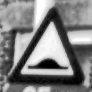

***************
train label:  2
train image:


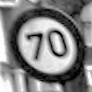

***************
train label:  3
train image:


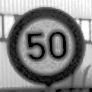

***************
train label:  4
train image:


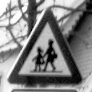

***************
train label:  5
train image:


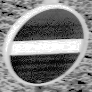

***************
train label:  6
train image:


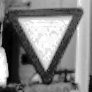

***************
train label:  7
train image:


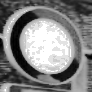

***************
train label:  8
train image:


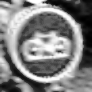

***************
train label:  9
train image:


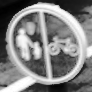

***************
train label:  10
train image:


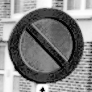

***************


In [5]:
#finding index of single image from each class
ind=np.unique(train_labels,return_index=True)
for i in ind[1]:
  #displaying label of the image
  print("train label: ",train_labels[i])
  #displaying corresponding image
  print("train image:")
  cv2_imshow(train_images[i])
  print("***************")
  #print(train_labels[i])'''

Drawing Keypoints on images

In [6]:
def draw_keypoints(vis, keypoints, color = (0, 255, 255)):
    #displaying image without keypoints
    cv2_imshow(vis)
    for kp in keypoints:
      #finding x and y coordinates of key points
      x, y = kp.pt
      #plotting image along with the keypoints
      plt.imshow(cv2.circle(vis, (int(x), int(y)), 2, color))

## **Training**

Using Fast for detecting keypoints and Orb for computing descriptors using keypoints detected by fast

In [7]:
descriptors=[]
keypoints=[]
y_train=[]
#creating object of FastFeature descriptor
fast = cv2.FastFeatureDetector_create()
#turing off non maximul suppression
fast.setNonmaxSuppression(False)
#creating object of ORB
orb=cv2.ORB_create(nfeatures=100)
for i in range(0,len(train_images)):
    #finding keypoints using Fast feature descriptor
    kp=fast.detect(train_images[i],None)
    #finding descriptors ORB
    kp,descriptor= orb.compute(train_images[i], kp)
    #appending all the descriptors, keypoints, train_labels with non-Null values
    if(len(kp)!=0):
      descriptors.append(descriptor)
      keypoints.append(kp)
      y_train.append(read_train[1][i])
#stacking all the descriptors from all the training examples
ds=descriptors[0]
for descriptor in descriptors[1:]:
    ds=np.vstack((ds,descriptor))
#displaying number of training examples
print(len(y_train))


800


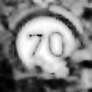

[<KeyPoint 0x7eff704af060>, <KeyPoint 0x7eff704af090>, <KeyPoint 0x7eff704af0c0>, <KeyPoint 0x7eff704af0f0>, <KeyPoint 0x7eff704af120>, <KeyPoint 0x7eff704af150>, <KeyPoint 0x7eff704af180>, <KeyPoint 0x7eff704af1b0>, <KeyPoint 0x7eff704af1e0>, <KeyPoint 0x7eff704af210>, <KeyPoint 0x7eff704af240>, <KeyPoint 0x7eff704af270>, <KeyPoint 0x7eff704af2a0>, <KeyPoint 0x7eff704af2d0>, <KeyPoint 0x7eff704af300>, <KeyPoint 0x7eff704af330>, <KeyPoint 0x7eff704af360>, <KeyPoint 0x7eff704af390>, <KeyPoint 0x7eff704af3c0>, <KeyPoint 0x7eff704af3f0>, <KeyPoint 0x7eff704af420>, <KeyPoint 0x7eff704af450>, <KeyPoint 0x7eff704af480>, <KeyPoint 0x7eff704af4b0>, <KeyPoint 0x7eff704af4e0>, <KeyPoint 0x7eff704af510>, <KeyPoint 0x7eff704af540>, <KeyPoint 0x7eff704af570>, <KeyPoint 0x7eff704af5a0>, <KeyPoint 0x7eff704af5d0>, <KeyPoint 0x7eff704af600>, <KeyPoint 0x7eff704af630>, <KeyPoint 0x7eff704af660>, <KeyPoint 0x7eff704af690>, <KeyPoint 0x7eff704af6c0>, <KeyPoint 0x7eff704af6f0>, <KeyPoint 0x7eff704af720>, 

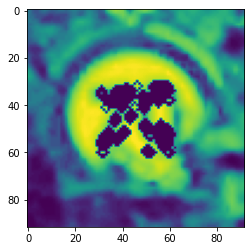

In [8]:
#displaying keypoints of a training example
draw_keypoints(train_images[100],keypoints[100])
print(keypoints[100])

Using K-Means Clustering on Discriptors

In [9]:
#converting desciptors type to float
descriptors_float=ds.astype(float)
#forming 10 clusters
k=10
voc,variance=kmeans(descriptors_float,k,1)
im_features=np.zeros((len(descriptors),k),"float32")
#calculating features
for i in range(len(descriptors)):
    words,distance=vq(descriptors[i],voc)
    for w in words:
        im_features[i][w]+=1

Performing Classification using SVM

In [10]:
#standardizing features
stdslr=StandardScaler().fit(im_features)
im_features=stdslr.transform(im_features)
#fitting SVM Model on training dataset
clf=LinearSVC(max_iter=80000)
clf.fit(im_features,np.array(y_train))

LinearSVC(max_iter=80000)

## **Testing**


Repeating the same pipeline for testing images



In [11]:
dstest=[]
t_labels=[]
for i in range(0,len(test_images)):
    #finding keypoints using Fast feature descriptor
    kp=fast.detect(test_images[i],None)
    #finding descriptors ORB
    kp, descriptor_test = orb.compute(test_images[i],  kp)
    #appending all the descriptors, keypoints, test_labels with non-Null values
    if(len(kp)!=0):
      dstest.append(descriptor_test)
      t_labels.append(test_labels[i])
#displaying number of testing examples
print(len(t_labels))

200


In [12]:
t_ds=dstest[0]
#stacking all the descriptors from all the testing examples
for descriptor in dstest[1:]:
    t_ds=np.vstack((t_ds,descriptor))

In [13]:
#calculating features
test_features=np.zeros((len(t_labels),k),"float32")
for i in range(len(t_labels)):
    words,distance=vq(dstest[i],voc)
    for w in words:
        test_features[i][w]+=1

In [14]:
#standardizing predictions
test_features=stdslr.transform(test_features)
predict_classes=[]
#running model on test features for predictions
for i in clf.predict(test_features):
        predict_classes.append(i)

## **Evaluation**

In [23]:
#gathering material for Qualitative and Quantitative Results
TP=0
misclassified_images=[]
misclassified_labels=[]
actual_labels=[]
correctlyclass_images=[]
correctlyclass_labels=[]
confusion_matrix=np.zeros((11,11))
for i in range(1,11):
  confusion_matrix[0][i]=i
  confusion_matrix[i][0]=i
for i in range(0,len(predict_classes)):
  print("actual labels:",t_labels[i],"predict labels: ",predict_classes[i])
  if(t_labels[i]==predict_classes[i]):
    TP+=1
    correctlyclass_images.append(test_images[i])
    correctlyclass_labels.append(predict_classes[i])
  else:
    misclassified_images.append(test_images[i])
    misclassified_labels.append(predict_classes[i])
    actual_labels.append(t_labels[i])
  confusion_matrix[t_labels[i]][predict_classes[i]]+=1


actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 3 predict labels:  3
actual labels: 2 predict labels:  2
actual labels: 2 predict labels:  2
actual labels: 2 predict labels:  2
actual labels: 2 predict labels:  2
actual labels: 2 predict labels:  2
actual labels: 2 predict labels:  2
actual labels: 2 predict labels:  2
actual labels: 2 predict lab

## Quantitative Results: Displaying Accuracy and Confusion Matrix

In [28]:
print("Accuracy: ",TP/len(predict_classes)*100)
print("Correctly Classified examples: ", TP)
print("Missclassified examples: ", len(predict_classes)-TP)
print()
print()
print("     #####################################################")
print("                      Confusion Matrix")
print("     #####################################################")
print("Column Axis for Predicted Classes")
print("Row Axis for Actual Classes")
table = Texttable()
table.set_deco(Texttable.HEADER)
table.add_rows(confusion_matrix)
print(table.draw())


Accuracy:  86.0
Correctly Classified examples:  172
Missclassified examples:  28


     #####################################################
                      Confusion Matrix
     #####################################################
Column Axis for Predicted Classes
Row Axis for Actual Classes
0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
1     16    1     0     0     1     1     0     0     1     0   
2     0     19    1     0     0     0     0     0     0     0   
3     0     0     20    0     0     0     0     0     0     0   
4     0     0     0     20    0     0     0     0     0     0   
5     0     0     0     0     17    0     1     0     2     0   
6     0     0     0     0     0     20    0     0     0     0   
7     5     1     0     0     1     5     4     1     3     0   
8     0     0     0     0     0     0     0     20    0     0   
9     0     0     2     0     0     0     0     2     16    0   
10    0     0     0     0     0     0     0     

## Qualitative Results: Displaying Correctly Classified Images and Misclassified Images

####################################
     Correctly Classified Images
####################################
Test Image: 


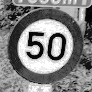

Test Label:  3
--------------------------------------
Test Image: 


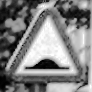

Test Label:  1
--------------------------------------
Test Image: 


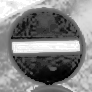

Test Label:  5
--------------------------------------
Test Image: 


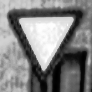

Test Label:  6
--------------------------------------
Test Image: 


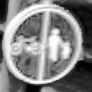

Test Label:  9
--------------------------------------
####################################
     Misclassified Images
####################################
Test Image: 


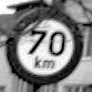

Predicted Label:  3
Actual Label:  2
--------------------------------------
Test Image: 


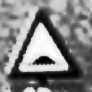

Predicted Label:  6
Actual Label:  1
--------------------------------------
Test Image: 


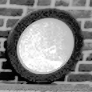

Predicted Label:  1
Actual Label:  7
--------------------------------------
Test Image: 


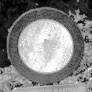

Predicted Label:  2
Actual Label:  7
--------------------------------------
Test Image: 


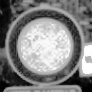

Predicted Label:  6
Actual Label:  7
--------------------------------------
Test Image: 


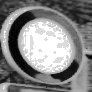

Predicted Label:  1
Actual Label:  7
--------------------------------------
Test Image: 


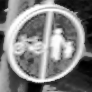

Predicted Label:  8
Actual Label:  9
--------------------------------------


In [32]:
print("####################################")
print("     Correctly Classified Images")
print("####################################")
for i in range(0,len(correctlyclass_images),40):
  print("Test Image: ")
  cv2_imshow(correctlyclass_images[i])
  print("Test Label: ",correctlyclass_labels[i])
  print("--------------------------------------")
print("####################################")
print("     Misclassified Images")
print("####################################")
for i in range(0,len(misclassified_images),4):
  print("Test Image: ")
  cv2_imshow(misclassified_images[i])
  print("Predicted Label: ",misclassified_labels[i])
  print("Actual Label: ",actual_labels[i])
  print("--------------------------------------")
